# Classification with random forest and decision trees

-- Assignment: Recreate the notebook with a regression example

In [11]:
# import Libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/josephgitau/Nov-Intake-Notebooks/refs/heads/main/gender_classification_v7.csv")
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [12]:
X = df.drop("gender", axis=1)
y = df["gender"]

In [13]:
## Instantiate the model
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lt_model = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model
dt_model.fit(X, y)
rf_model.fit(X, y)
lt_model.fit(X, y)

# Make predictions
dt_predictions = dt_model.predict(X)
rf_predictions = rf_model.predict(X)
lt_predictions = lt_model.predict(X)

# Evaluate the models   
print("Decision Tree Classifier Report:")
print(classification_report(y, dt_predictions))
print("Random Forest Classifier Report:")
print(classification_report(y, rf_predictions))
print("Logistic Regression Classifier Report:")
print(classification_report(y, lt_predictions))

Decision Tree Classifier Report:
              precision    recall  f1-score   support

      Female       1.00      1.00      1.00      2501
        Male       1.00      1.00      1.00      2500

    accuracy                           1.00      5001
   macro avg       1.00      1.00      1.00      5001
weighted avg       1.00      1.00      1.00      5001

Random Forest Classifier Report:
              precision    recall  f1-score   support

      Female       1.00      1.00      1.00      2501
        Male       1.00      1.00      1.00      2500

    accuracy                           1.00      5001
   macro avg       1.00      1.00      1.00      5001
weighted avg       1.00      1.00      1.00      5001

Logistic Regression Classifier Report:
              precision    recall  f1-score   support

      Female       0.97      0.97      0.97      2501
        Male       0.97      0.97      0.97      2500

    accuracy                           0.97      5001
   macro avg       0.97

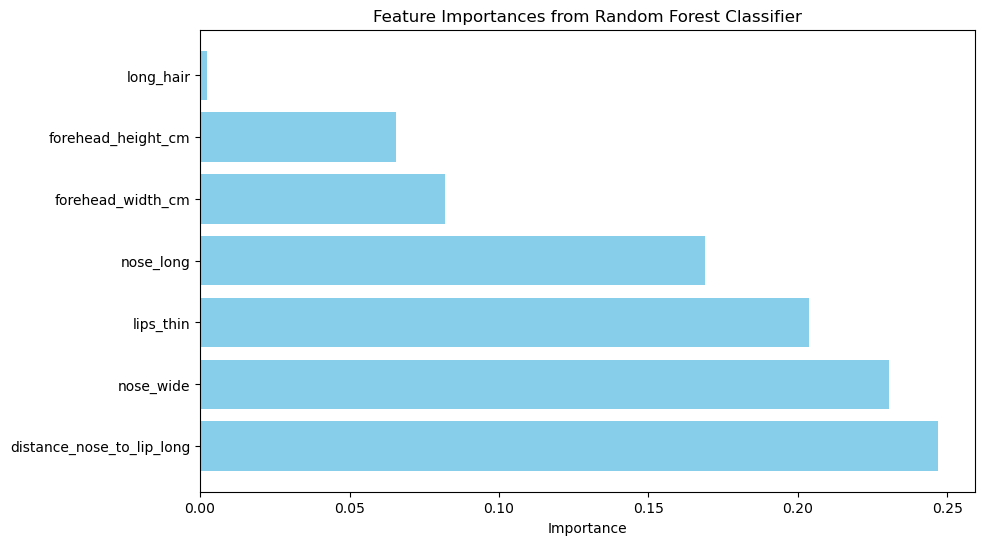

In [14]:
## Randon Forest Feature Importance
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
importances = rf_model.feature_importances_

feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Classifier')
plt.show()

Decision Tree Structure:
|--- nose_wide <= 0.50
|   |--- lips_thin <= 0.50
|   |   |--- forehead_width_cm <= 14.40
|   |   |   |--- forehead_height_cm <= 6.55
|   |   |   |   |--- distance_nose_to_lip_long <= 0.50
|   |   |   |   |   |--- forehead_width_cm <= 13.45
|   |   |   |   |   |   |--- class: Female
|   |   |   |   |   |--- forehead_width_cm >  13.45
|   |   |   |   |   |   |--- nose_long <= 0.50
|   |   |   |   |   |   |   |--- forehead_width_cm <= 13.75
|   |   |   |   |   |   |   |   |--- forehead_width_cm <= 13.65
|   |   |   |   |   |   |   |   |   |--- class: Female
|   |   |   |   |   |   |   |   |--- forehead_width_cm >  13.65
|   |   |   |   |   |   |   |   |   |--- forehead_height_cm <= 6.05
|   |   |   |   |   |   |   |   |   |   |--- class: Female
|   |   |   |   |   |   |   |   |   |--- forehead_height_cm >  6.05
|   |   |   |   |   |   |   |   |   |   |--- forehead_height_cm <= 6.15
|   |   |   |   |   |   |   |   |   |   |   |--- class: Female
|   |   |   |   |  

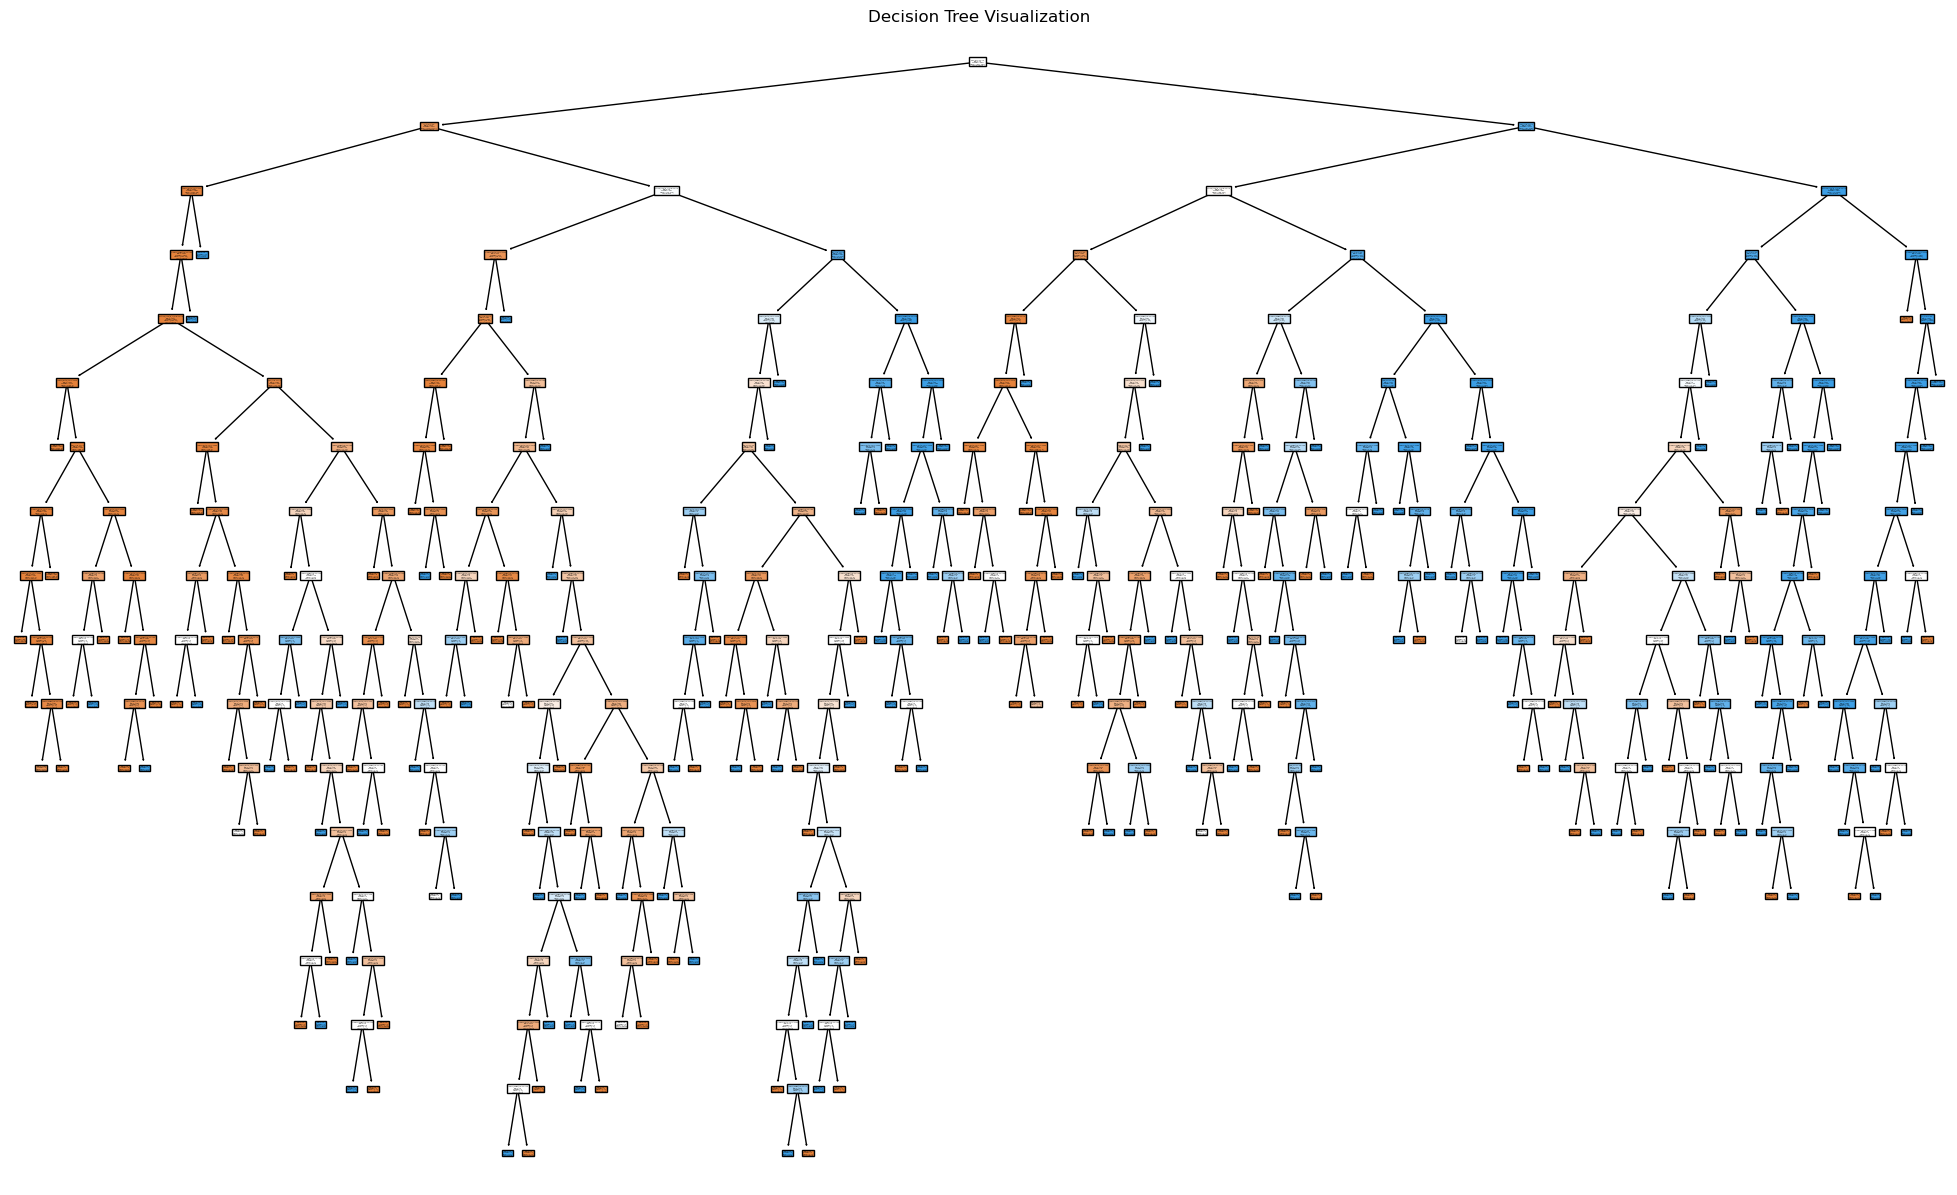

In [15]:
## Visualize the Decision Tree
from sklearn.tree import export_text

print("Decision Tree Structure:")
print(export_text(dt_model, feature_names=list(X.columns)))

## Create a plot of the Decision Tree


plt.figure(figsize=(25, 15))
plot_tree(dt_model, feature_names=X.columns, class_names=dt_model.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

## KNN

In [21]:
# library import
from sklearn.neighbors import KNeighborsClassifier

# instantiate model
knn_model = KNeighborsClassifier(n_neighbors=2)

# fit model
knn_model.fit(X, y)

# predict
knn_predictions = knn_model.predict(X)

# eveluate the model
print("K-Nearest Neighbors Classifier Report:")
print(classification_report(y, knn_predictions))

K-Nearest Neighbors Classifier Report:
              precision    recall  f1-score   support

      Female       0.96      1.00      0.98      2501
        Male       1.00      0.96      0.98      2500

    accuracy                           0.98      5001
   macro avg       0.98      0.98      0.98      5001
weighted avg       0.98      0.98      0.98      5001



## KMeans and Hierarchical Clustering


This are unsupervised learning models, so it mwans the labels are not shown to the model. The model has to create the labels on it's own

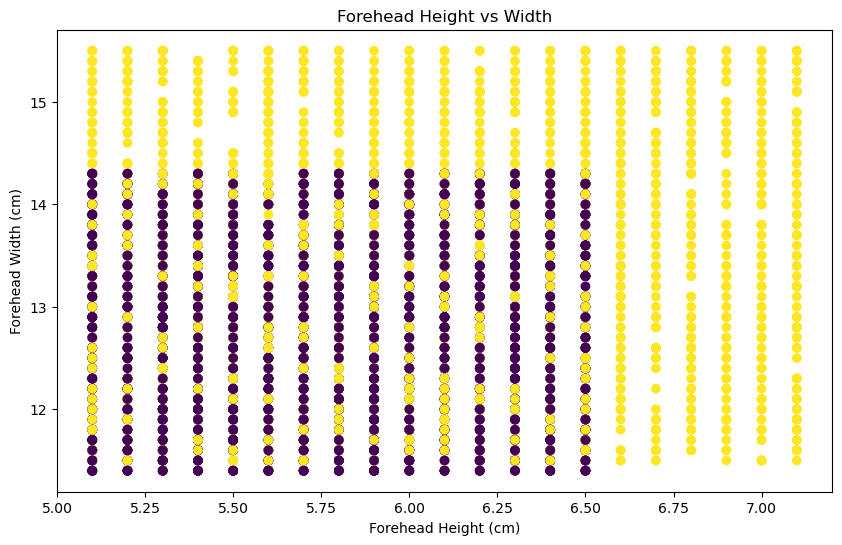

In [32]:
## Plot 
plt.figure(figsize=(10, 6))
plt.scatter(X["forehead_height_cm"], X["forehead_width_cm"], c=y.map({"Male":1, "Female":0}))
plt.xlabel("Forehead Height (cm)")
plt.ylabel("Forehead Width (cm)")
plt.title("Forehead Height vs Width")
plt.show()

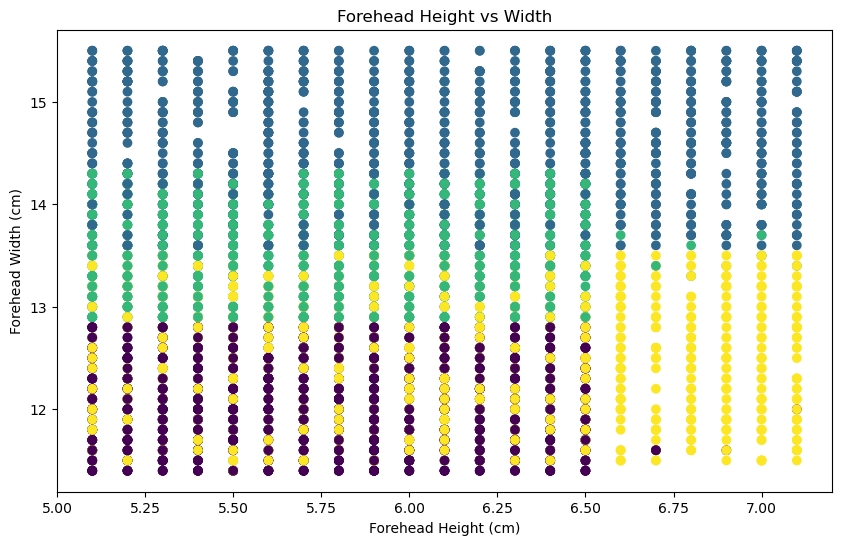

In [40]:
## KMeans and Hierarchical Clustering
from sklearn.cluster import KMeans

# instantiate the model
km = KMeans(n_clusters=4, random_state=42)

# fit the model
km.fit(X)

# Extract the cluster labels
km_labels = km.labels_

## Plot 
plt.figure(figsize=(10, 6))
plt.scatter(X["forehead_height_cm"], X["forehead_width_cm"], c=km_labels)
plt.xlabel("Forehead Height (cm)")
plt.ylabel("Forehead Width (cm)")
plt.title("Forehead Height vs Width")
plt.show()

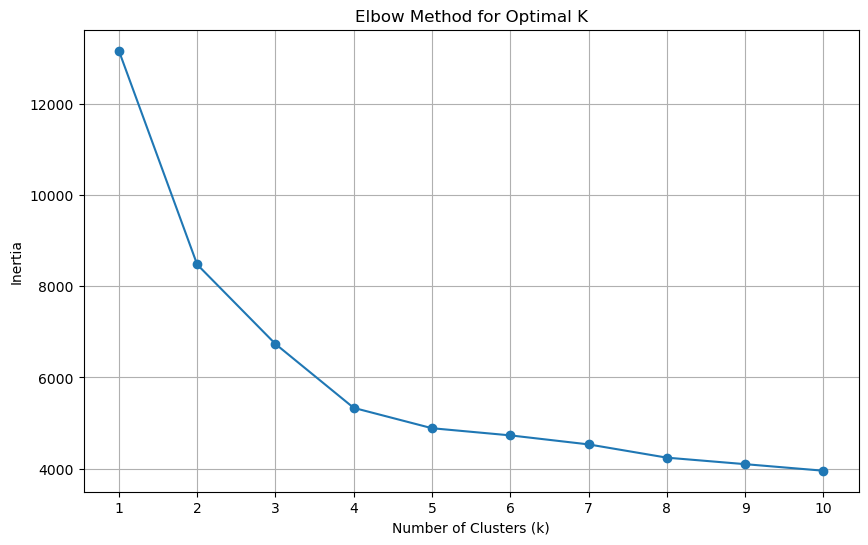

In [39]:
# inertia plot
inertia = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(range(1, 11))
plt.grid()
plt.show()

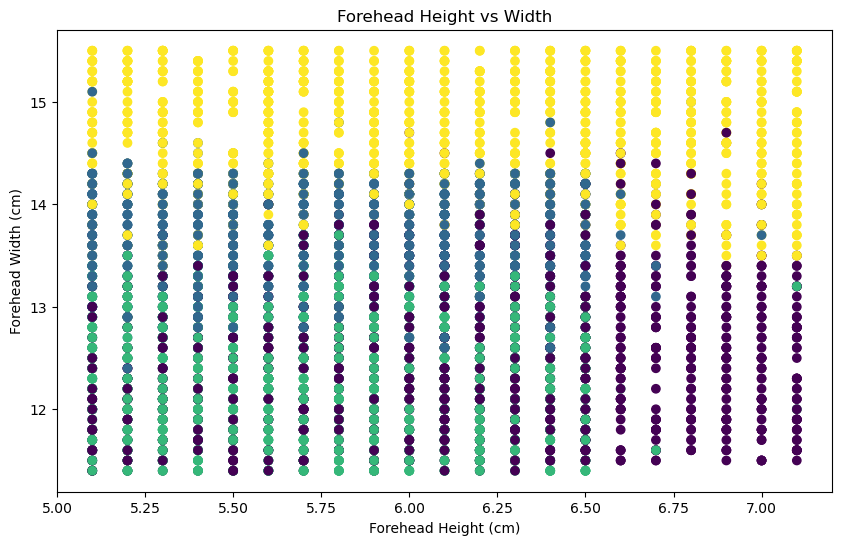

In [41]:
## sklearn's Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4)

# fit the model
agg.fit(X)

# Extract the cluster labels
agg_labels = agg.labels_

## Plot 
plt.figure(figsize=(10, 6))
plt.scatter(X["forehead_height_cm"], X["forehead_width_cm"], c=agg_labels)
plt.xlabel("Forehead Height (cm)")
plt.ylabel("Forehead Width (cm)")
plt.title("Forehead Height vs Width")
plt.show()

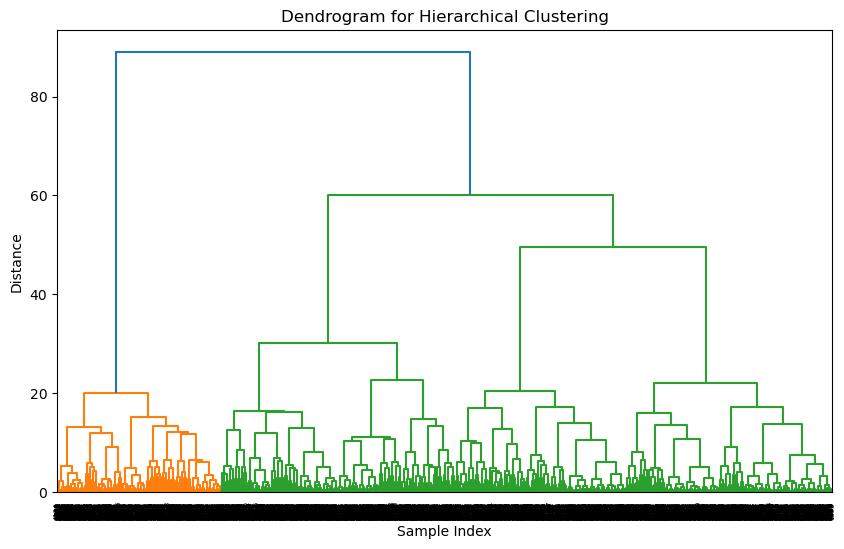

In [42]:
# plot the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(Z, labels=X.index, leaf_rotation=90)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()